**DATASET INFO:**

The dataset contains count of public bicycles rented per hour in the Seoul Bike Sharing System, with corresponding weather data and holiday information.

Repository:https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand

**Variable Information :**

1. Date : year-month-day
2. Rented Bike count - Count of bikes rented at each hour
3. Hour - Hour of he day
4. Temperature-Temperature in Celsius
5. Humidity - %
6. Windspeed - m/s
7. Visibility - 10m
8. Dew point temperature - Celsius
9. Solar radiation - MJ/m2
10. Rainfall - mm
11. Snowfall - cm
12. Seasons - Winter, Spring, Summer, Autumn
13. Holiday - Holiday/No holiday
14. Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)




























In [ ]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LinearRegression

In [ ]:
cols = [ "RentedBikeCount", "Hour", "Temperature", "Humidity", "Windspeed", "Visibility", "DewPointTemp", "SolarRadiation", "Rainfall", "Snowfall", "FunctionalDay"]

In [ ]:
#reading the data and droping columns Date, Seasons and Holiday
df = pd.read_csv("./drive/MyDrive/SeoulBikeData.csv", encoding='unicode_escape').drop(["Date", "Seasons", "Holiday"], axis = 1)

In [ ]:
# Changing Column names
df.columns = cols

In [ ]:
df.head()

,RentedBikeCount,Hour,Temperature,Humidity,Windspeed,Visibility,DewPointTemp,SolarRadiation,Rainfall,Snowfall,FunctionalDay
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Yes


In [ ]:
# Changing Values of FunctionalDay column to 1s and 0s
df["FunctionalDay"] = (df["FunctionalDay"] == "Yes").astype(int)
df["FunctionalDay"].value_counts()

,count
FunctionalDay,
1,8465
0,295


In [ ]:
# Selecting only data with Hour as 8 and dropping the column
df1 = df[df["Hour"] == 8]
df1 = df1.drop(["Hour"], axis =1)
df1.head()

,RentedBikeCount,Temperature,Humidity,Windspeed,Visibility,DewPointTemp,SolarRadiation,Rainfall,Snowfall,FunctionalDay
8,930,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,1
32,219,-4.2,79,2.1,1436,-7.3,0.01,0.0,0.0,1
56,85,3.2,92,1.8,244,2.0,0.00,0.0,0.0,1
80,937,-0.8,69,3.5,954,-5.7,0.01,0.0,0.0,1
104,812,-8.1,36,1.6,2000,-20.5,0.01,0.0,0.0,1


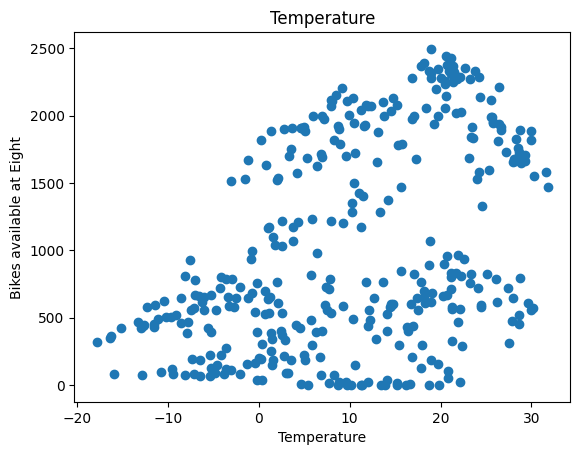

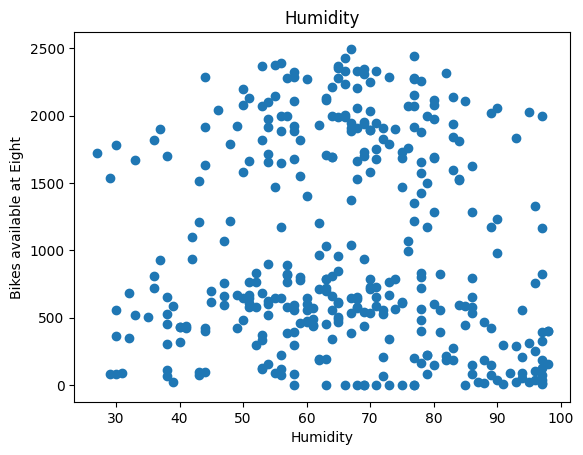

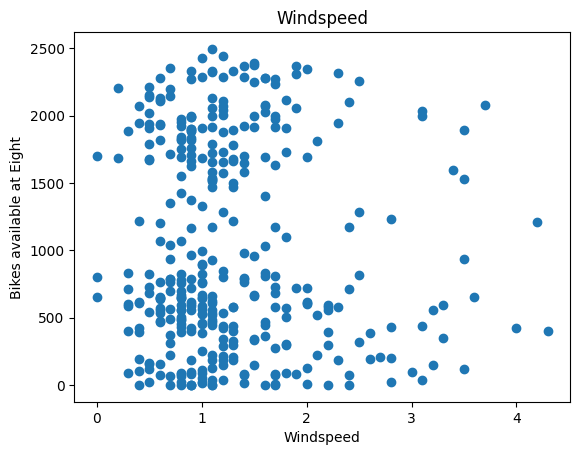

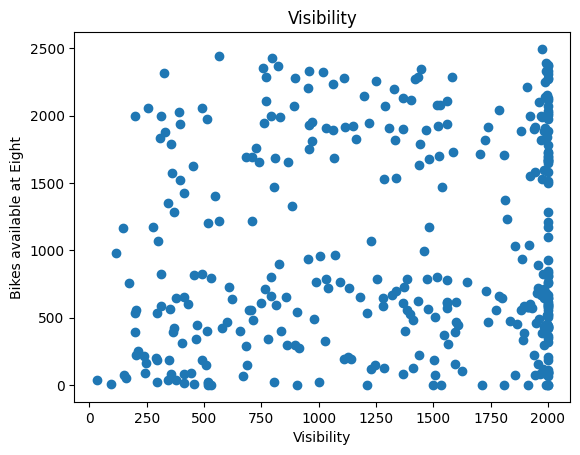

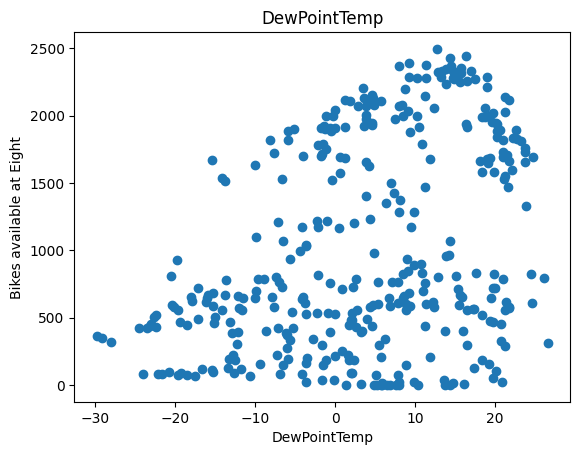

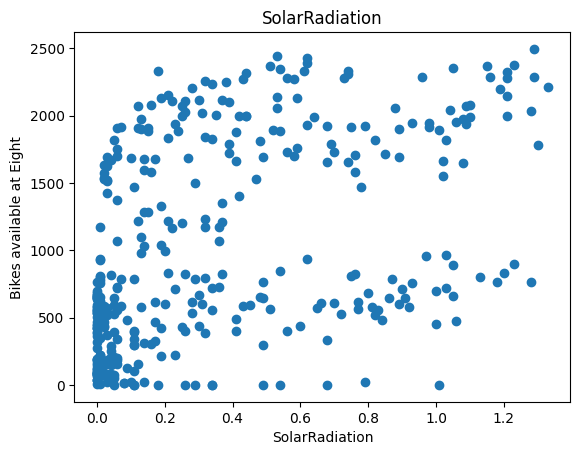

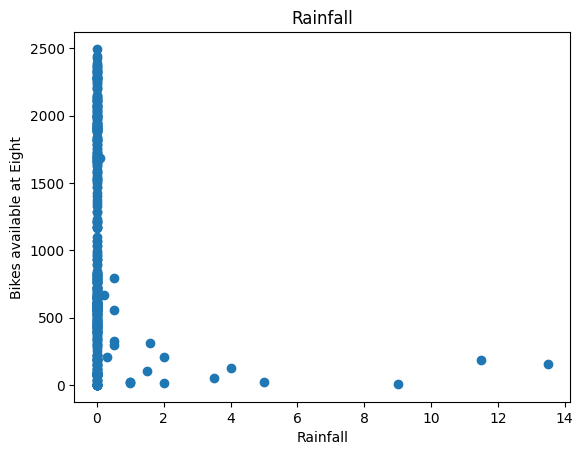

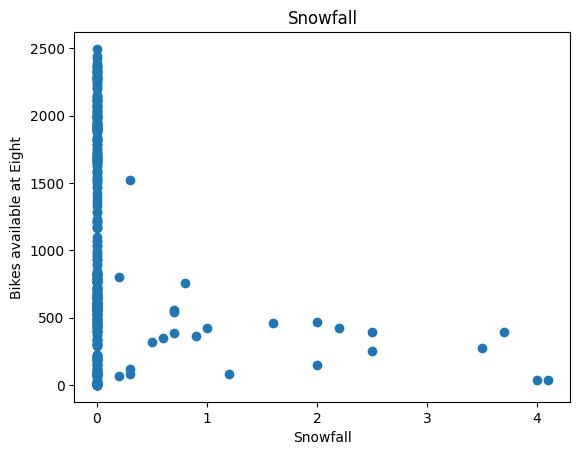

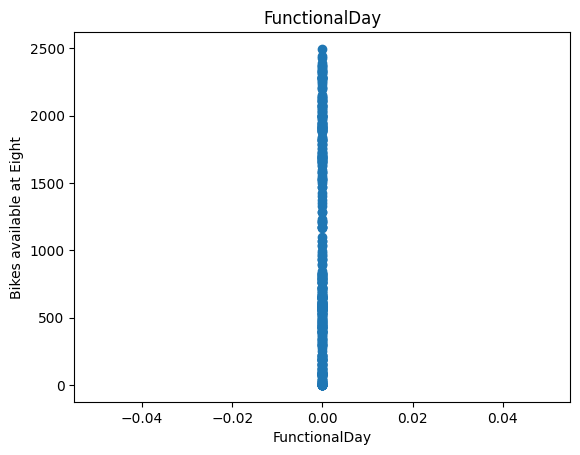

In [ ]:
# Plotting

for label in df1.columns[1:]:
  plt.scatter(df1[label], df1["RentedBikeCount"])
  plt.title(label)
  plt.ylabel("Bikes available at Eight")
  plt.xlabel(label)
  plt.show()

In [ ]:
# Removing Visibility and FunctionalDay columns as they don't provide any useful insight
df1 = df1.drop(["Windspeed", "Visibility", "FunctionalDay"], axis =1)
df1.head()

,RentedBikeCount,Temperature,Humidity,DewPointTemp,SolarRadiation,Rainfall,Snowfall
8,930,-7.6,37,-19.8,0.01,0.0,0.0
32,219,-4.2,79,-7.3,0.01,0.0,0.0
56,85,3.2,92,2.0,0.00,0.0,0.0
80,937,-0.8,69,-5.7,0.01,0.0,0.0
104,812,-8.1,36,-20.5,0.01,0.0,0.0


## **Splitting data into Train/Valid/Test**

In [ ]:
train, valid, test = np.split(df1.sample(frac =1), [int(0.6*len(df1)), int(0.8*len(df1))])

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [ ]:
def get_xy(dataframe, y_label, x_labels = None):
  dataframe = copy.deepcopy(dataframe)
  if x_labels is None:
    X = dataframe[[c for c in dataframe.columns if c!= y_label]].values
  else:
    if len(x_labels) == 1:
      X = dataframe[x_labels[0]].values.reshape(-1, 1)
    else:
      X = dataframe[x_labels].values

  y = dataframe[y_label].values.reshape(-1, 1)
  data = np.hstack((X, y))

  return data, X, y

###**Simple Linear Regression**

In [ ]:
_, X_train_temp, y_train_temp = get_xy(train, "RentedBikeCount", x_labels = ["Temperature"])
_, X_valid_temp, y_valid_temp = get_xy(valid, "RentedBikeCount", x_labels = ["Temperature"])
_, X_test_temp, y_test_temp = get_xy(test, "RentedBikeCount", x_labels = ["Temperature"])

In [ ]:
temp_reg = LinearRegression()
temp_reg.fit(X_train_temp, y_train_temp)

LinearRegression()

In [ ]:
temp_reg.score(X_test_temp, y_test_temp)

0.13960847582098768

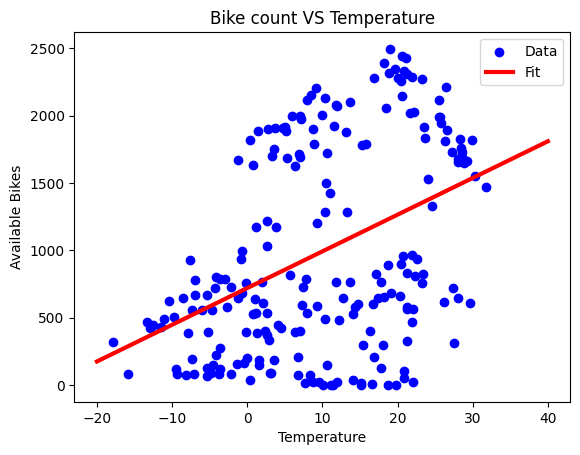

In [ ]:
plt.scatter(X_train_temp, y_train_temp, label = "Data", color = "blue")
x = tf.linspace(-20, 40, 100)
plt.plot(x, temp_reg.predict(np.array(x).reshape(-1, 1)), label = "Fit", color = "red", linewidth = 3)
plt.legend()
plt.title("Bike count VS Temperature")
plt.ylabel("Available Bikes")
plt.xlabel("Temperature")
plt.show()

In [ ]:
# Linear regression assumptions are not applicable

##**Multiple Linear Regression**

In [ ]:
_, X_train, y_train = get_xy(train, "RentedBikeCount", x_labels = df1.columns[1:])
_, X_valid, y_valid = get_xy(valid, "RentedBikeCount", x_labels = df1.columns[1:])
_, X_test, y_test = get_xy(test, "RentedBikeCount", x_labels = df1.columns[1:])

In [ ]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
reg.score(X_test, y_test)

0.1434831389374639

## **Linear Regression with Neural Network**

In [ ]:
# Simple Linear Regression
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis = None)
temp_normalizer.adapt(X_train_temp.reshape(-1))

In [ ]:
temp_nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(1)
])

In [ ]:
temp_nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss = 'mean_squared_error')

In [ ]:
history = temp_nn_model.fit(
    X_train_temp.reshape(-1), y_train_temp,
    verbose = 0,
    epochs = 1000,
    validation_data = (X_valid_temp, y_valid_temp)
)

In [ ]:
def plot_history(history):
  plt.plot(history.history['loss'], label = 'loss')
  plt.plot(history.history['val_loss'], label = 'val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('MSE')
  plt.legend()
  plt.grid(True)
  plt.show()

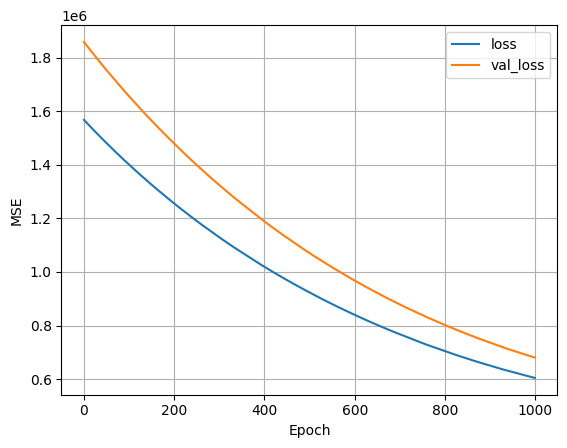

In [ ]:
plot_history(history)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


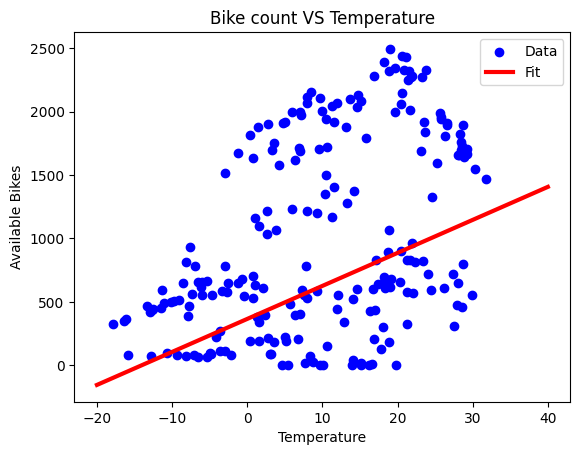

In [ ]:
plt.scatter(X_train_temp, y_train_temp, label = "Data", color = "blue")
x = tf.linspace(-20, 40, 100)
plt.plot(x, temp_nn_model.predict(np.array(x).reshape(-1, 1)), label = "Fit", color = "red", linewidth = 3)
plt.legend()
plt.title("Bike count VS Temperature")
plt.ylabel("Available Bikes")
plt.xlabel("Temperature")
plt.show()

In [ ]:
# Multiple Linear regression with NN

# Adjust the Normalization layer for input shape of (6,)
df1_normalizer = tf.keras.layers.Normalization(input_shape=(6,), axis=-1)
df1_normalizer.adapt(X_train)

# Build the model with multiple inputs
df1_nn_model = tf.keras.Sequential([
    df1_normalizer,
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(1)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
df1_nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss = 'mean_squared_error')

In [ ]:
# Train the model with the adjusted input shape
history = df1_nn_model.fit(
    X_train, y_train,
    verbose=0,
    epochs=1000,
    validation_data=(X_valid, y_valid)
)

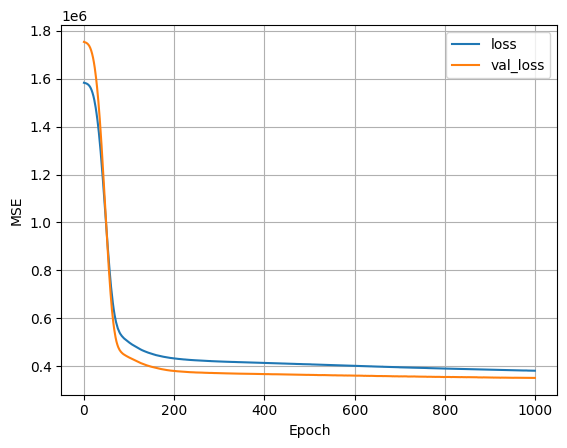

In [ ]:
plot_history(history)

In [ ]:
# Measuring the MSE for both MLR and NN models

y_pred_lr = reg.predict(X_test)
y_pred_nn = df1_nn_model.predict(X_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


In [ ]:
def MSE(y_real, y_pred):
  return (np.square(y_real - y_pred)).mean()

In [ ]:
MSE(y_test, y_pred_lr)

399115.451056018

In [ ]:
MSE(y_test, y_pred_nn)

367653.83537500165

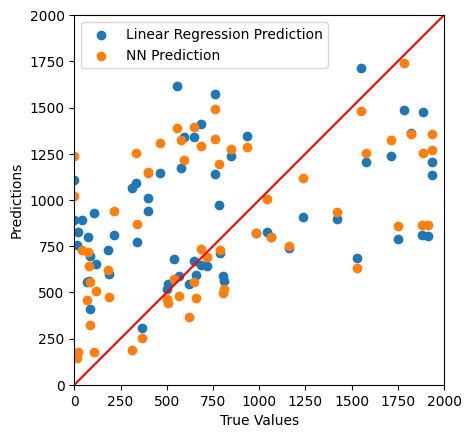

In [ ]:
# PLotting the prediction

ax = plt.axes(aspect = 'equal')
plt.scatter(y_test, y_pred_lr, label = 'Linear Regression Prediction')
plt.scatter(y_test, y_pred_nn, label = 'NN Prediction')
plt.xlabel("True Values")
plt.ylabel("Predictions")
lims = [0, 2000]
plt.xlim(lims)
plt.ylim(lims)
plt.legend()
_ = plt.plot(lims, lims, c='red')

In [ ]:
# MLR shows better results than NN

In [ ]:
# Selecting only data with Hour as 10 and dropping the column
df2 = df[df["Hour"] == 10]
df2 = df2.drop(["Hour"], axis =1)
df1.head()

,RentedBikeCount,Temperature,Humidity,DewPointTemp,SolarRadiation,Rainfall,Snowfall
8,930,-7.6,37,-19.8,0.01,0.0,0.0
32,219,-4.2,79,-7.3,0.01,0.0,0.0
56,85,3.2,92,2.0,0.00,0.0,0.0
80,937,-0.8,69,-5.7,0.01,0.0,0.0
104,812,-8.1,36,-20.5,0.01,0.0,0.0


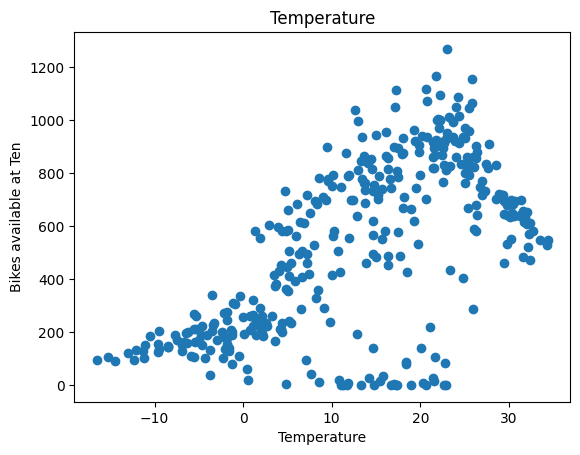

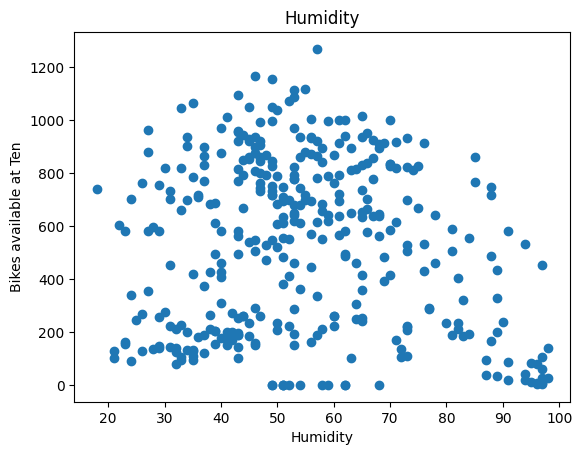

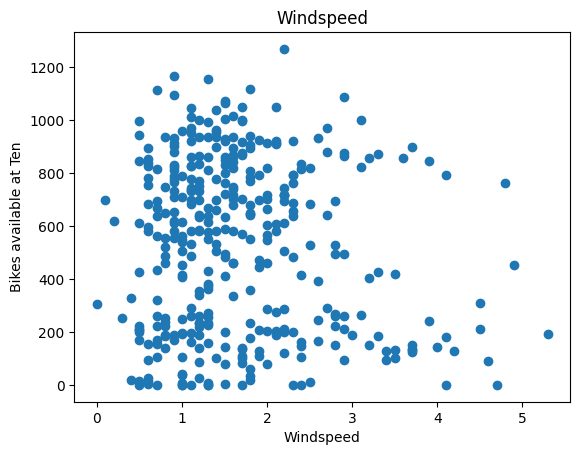

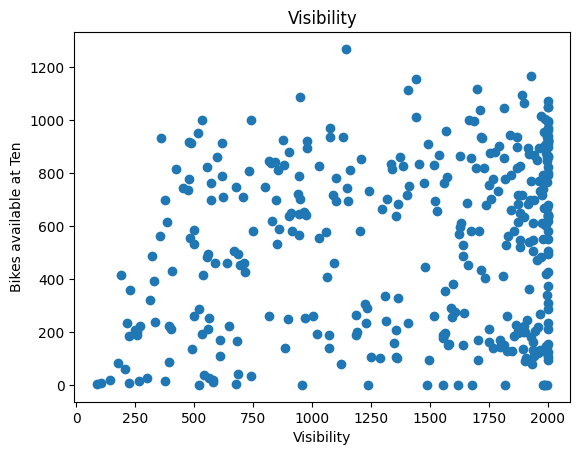

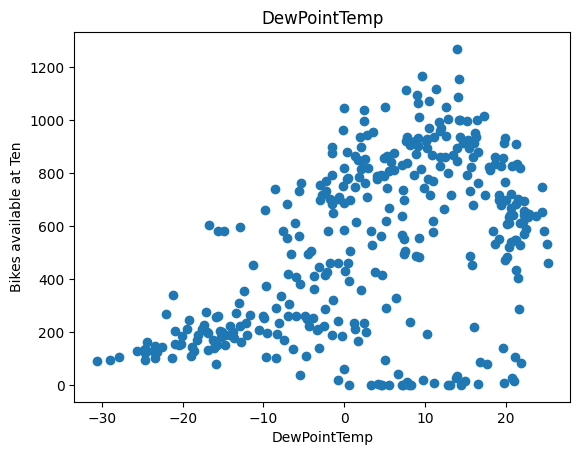

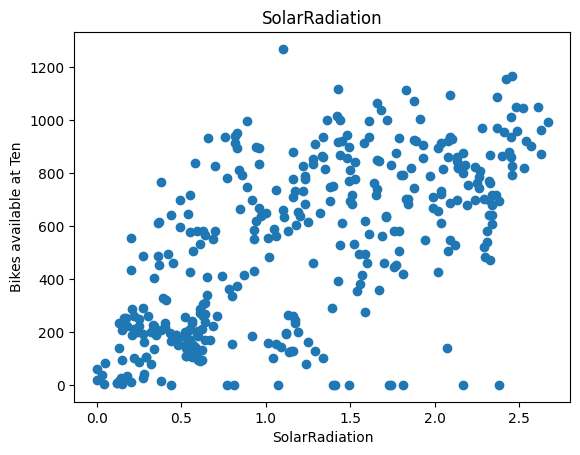

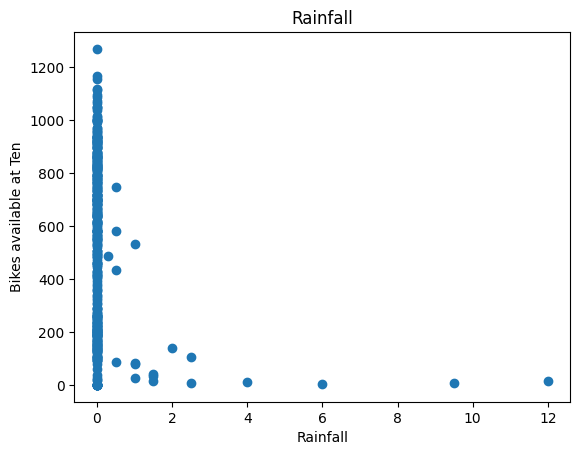

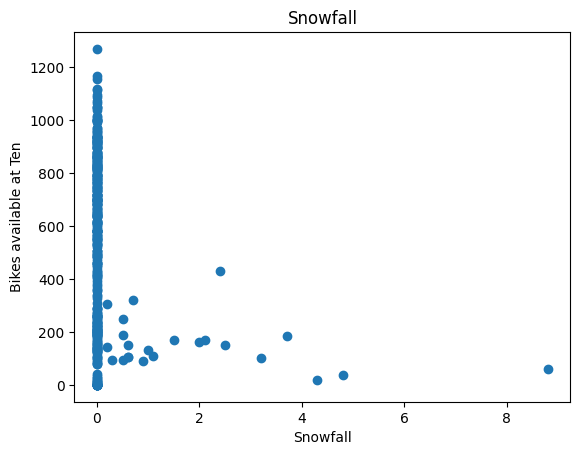

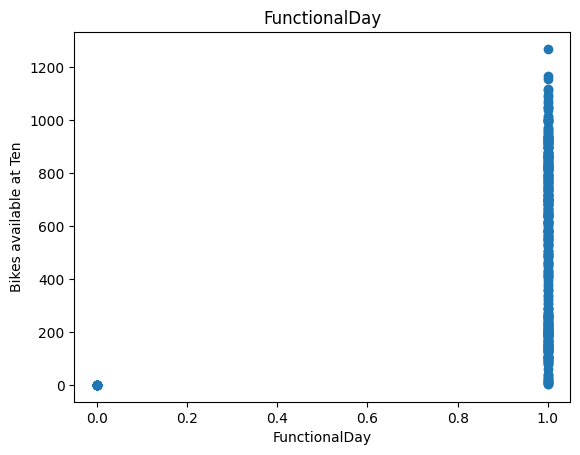

In [ ]:
# Plotting

for label in df2.columns[1:]:
  plt.scatter(df2[label], df2["RentedBikeCount"])
  plt.title(label)
  plt.ylabel("Bikes available at Ten")
  plt.xlabel(label)
  plt.show()

In [ ]:
# Removing Visibility and FunctionalDay columns as they don't provide any useful insight
df2 = df2.drop(["Windspeed", "Visibility", "FunctionalDay"], axis =1)
df2.head()

,RentedBikeCount,Temperature,Humidity,DewPointTemp,SolarRadiation,Rainfall,Snowfall
10,339,-3.5,24,-21.2,0.65,0.0,0.0
34,334,-0.4,57,-7.8,0.80,0.0,0.0
58,200,4.4,89,2.7,0.24,0.0,0.0
82,311,-1.1,40,-13.0,0.64,0.0,0.0
106,269,-5.5,26,-22.0,0.64,0.0,0.0


In [ ]:
# Splitting data into Train/Valid/Test
train, valid, test = np.split(df2.sample(frac =1), [int(0.6*len(df2)), int(0.8*len(df2))])

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [ ]:
# Multiple Linear Regression
_, X_train, y_train = get_xy(train, "RentedBikeCount", x_labels = df2.columns[1:])
_, X_valid, y_valid = get_xy(valid, "RentedBikeCount", x_labels = df2.columns[1:])
_, X_test, y_test = get_xy(test, "RentedBikeCount", x_labels = df2.columns[1:])

In [ ]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
reg.score(X_test, y_test)

0.4967008974082151

In [ ]:
# Multiple Linear regression with NN

# Adjust the Normalization layer for input shape of (6,)
df2_normalizer = tf.keras.layers.Normalization(input_shape=(6,), axis=-1)
df2_normalizer.adapt(X_train)

# Build the model with multiple inputs
df2_nn_model = tf.keras.Sequential([
    df1_normalizer,
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(1)
])

In [ ]:
df2_nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss = 'mean_squared_error')

In [ ]:
# Train the model with the adjusted input shape
history = df2_nn_model.fit(
    X_train, y_train,
    verbose=0,
    epochs=1000,
    validation_data=(X_valid, y_valid)
)

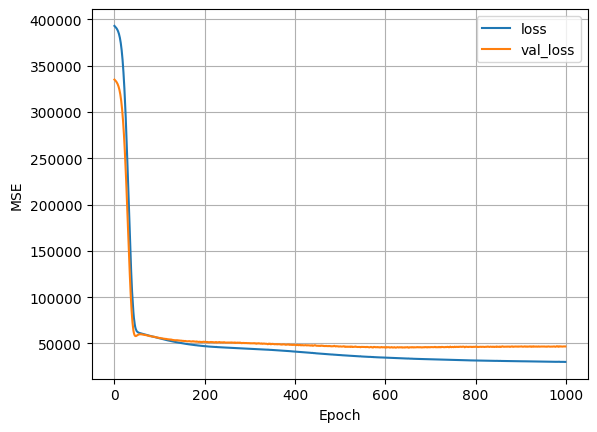

In [ ]:
plot_history(history)

In [ ]:
# Measuring the MSE for both MLR and NN models

y_pred_lr = reg.predict(X_test)
y_pred_nn = df2_nn_model.predict(X_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 154ms/step


In [ ]:
def MSE(y_real, y_pred):
  return (np.square(y_real - y_pred)).mean()

In [ ]:
MSE(y_test, y_pred_lr)

48137.268310224405

In [ ]:
MSE(y_test, y_pred_nn)

41948.16217727654

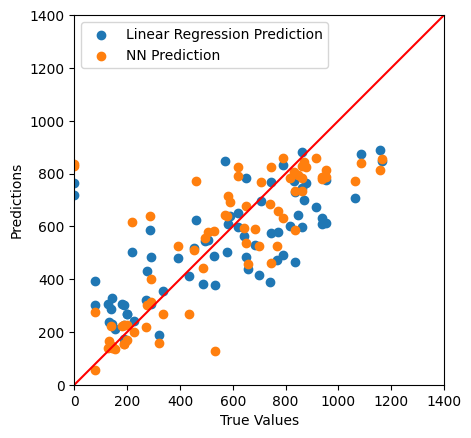

In [ ]:
# PLotting the prediction

ax = plt.axes(aspect = 'equal')
plt.scatter(y_test, y_pred_lr, label = 'Linear Regression Prediction')
plt.scatter(y_test, y_pred_nn, label = 'NN Prediction')
plt.xlabel("True Values")
plt.ylabel("Predictions")
lims = [0, 1400]
plt.xlim(lims)
plt.ylim(lims)
plt.legend()
_ = plt.plot(lims, lims, c='red')